<a href="https://colab.research.google.com/github/nekotanku/colab/blob/master/%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
#データセットダウンロード
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip 

--2020-08-18 01:38:02--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 54.230.126.123, 54.230.126.37, 54.230.126.72, ...
Connecting to download.pytorch.org (download.pytorch.org)|54.230.126.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  28.1MB/s    in 1.6s    

2020-08-18 01:38:04 (28.1 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [5]:
#確認
!ls

hymenoptera_data.zip  sample_data


In [6]:
#zip解凍
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [7]:
#解凍できたか確認
!ls

hymenoptera_data  hymenoptera_data.zip	sample_data


In [8]:
#hymenoptera_dataの中身を確認
!ls hymenoptera_data

train  val


In [9]:
#trainの中を確認
!ls hymenoptera_data/train

ants  bees


In [10]:
#前処理の定義
transform = transforms.Compose([
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))
])

In [13]:
#今回はImageFolderを使用して使いたいデータのあるフォルダを指定する
#最初から画像毎にフォルダが分かれている場合にはImageFolder、そうでない場合は後で説明をするカスタムデータセットを使う。
train_dataset = datasets.ImageFolder("./hymenoptera_data/train", transform=transform)
#Dataloader作成
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [14]:
#データを取り出してみる
data_iter = iter(train_loader)
imgs, labels = data_iter.next()

In [15]:
labels

tensor([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1])

In [17]:
#バッチサイズ, カラー, 縦, 横
#(224,224)にリサイズされてる
imgs.size()

torch.Size([32, 3, 224, 224])

In [18]:
#０番目を取り出す
img = imgs[0]
#配列を変更
img_permute = img.permute(1, 2, 0)
#明るさを調整
img_permute = 0.5 * img_permute + 0.5

#np.clip : NumPy配列ndarrayを任意の最小値・最大値に収める
#第一引数aに処理する配列ndarray、第二引数a_minに最小値、第三引数a_maxに最大値を指定する。
img_permute = np.clip(img_permute, 0, 1)

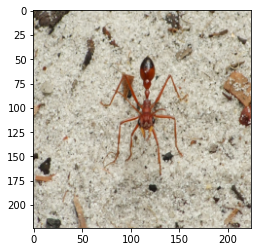

In [19]:
plt.imshow(img_permute)

０：アリ、
１：ハチ


In [20]:
#学習済みモデルの重みをダウンロード
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [21]:
#モデル確認
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [22]:
#勾配計算しないように設定
for param in model.parameters():
    param.requires_grad = False

In [23]:
#最後の層を付け替え
model.fc = nn.Linear(512, 2)

In [24]:
#モデルを確認
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
#GPUにもでるを送る
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
#損失関数,オプティマイザを定義
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [29]:
#学習ループ
num_epoch = 15
losses = []
accs = []
for epoch in range(num_epoch):
    running_loss = 0.0
    running_acc = 0.0 
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss  += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_loader)
    running_acc /= len(train_loader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc{}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.6607470661401749, acc0.5874999761581421
epoch: 1, loss: 0.46120181307196617, acc0.846875011920929
epoch: 2, loss: 0.37124622613191605, acc0.8921874761581421
epoch: 3, loss: 0.27871890738606453, acc0.9507812261581421
epoch: 4, loss: 0.2679205760359764, acc0.921875
epoch: 5, loss: 0.21595698781311512, acc0.9585937261581421
epoch: 6, loss: 0.24165945686399937, acc0.9429687261581421
epoch: 7, loss: 0.17287302669137716, acc0.96875
epoch: 8, loss: 0.16166935674846172, acc0.9765625
epoch: 9, loss: 0.16597532760351896, acc0.960156261920929
epoch: 10, loss: 0.1606102930381894, acc0.9585937261581421
epoch: 11, loss: 0.14199425373226404, acc0.97265625
epoch: 12, loss: 0.15576542634516954, acc0.96484375
epoch: 13, loss: 0.12473765574395657, acc0.9781249761581421
epoch: 14, loss: 0.11009538220241666, acc0.98046875


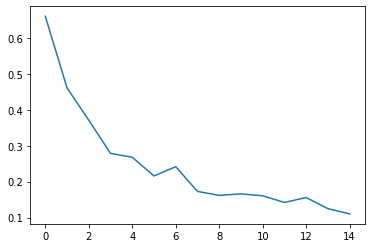

In [30]:
plt.plot(losses)

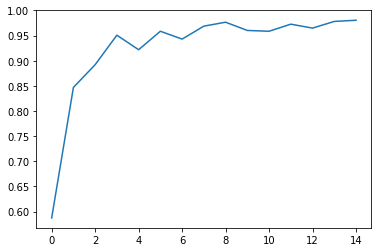

In [31]:
plt.plot(accs)